In [4]:
import numpy as np
import hmvec as hm
import matplotlib
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15
cosmo = Planck15

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [6]:
#Plot settings
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['xtick.labelsize'] = 'large'
matplotlib.rcParams['ytick.labelsize'] = 'large'
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'x-large'
matplotlib.rcParams['figure.titlesize'] = 'xx-large'

# Comparing with Fiona

Redshifts: linspace(0.01, 6, 60)

Masses: logspace(6, 15, 1983)

In [7]:
#Setup Grid
Nk = 1000                                # num of wavenumbers
masses = np.load('m.npy')
redshifts = np.load('z.npy')        
ks = np.geomspace(1.0e-3, 100.0, Nk)              # wavenumbers
Nm = len(masses)
Nz = len(redshifts)

In [6]:
Nz

60

In [7]:
Nm

1983

In [8]:
masses

array([1.00334600e+10, 1.01036255e+10, 1.01742816e+10, ...,
       9.86159070e+15, 9.93055422e+15, 1.00000000e+16])

In [ ]:
#Initialize Halo Model 
hcos = hm.HaloModel(redshifts, ks, ms=masses, mass_function='tinker')

Load/setup Fiona's data:

In [8]:
fio_dndm = np.load('nfn.npy')
fio_masses = np.geomspace(masses[0], masses[-1], num=2000)
fio_bias = np.load('bias.npy')
fio_nus = np.load('/home/r/rbond/ymehta3/scratch/fio_nus.npy')

In [9]:
fio_bias.shape

(2000, 60)

In [10]:
fio_dndm.shape

(2000, 60)

In [ ]:
fio_masses.shape

In [ ]:
fio_nus.shape

Load data from hmvec:

In [23]:
# dndm1 = np.load('/home/r/rbond/ymehta3/scratch/my_fnus.npy')
# dndm2 = np.load('/home/r/rbond/ymehta3/scratch/my_fnus2.npy')
fnus = np.load('/home/r/rbond/ymehta3/scratch/fnus.npy')
nus = np.load('/home/r/rbond/ymehta3/scratch/nus.npy')
bh = np.load('/home/r/rbond/ymehta3/scratch/mybias.npy')
nzm = np.load('/home/r/rbond/ymehta3/scratch/nzm.npy')

### Central Mass Function

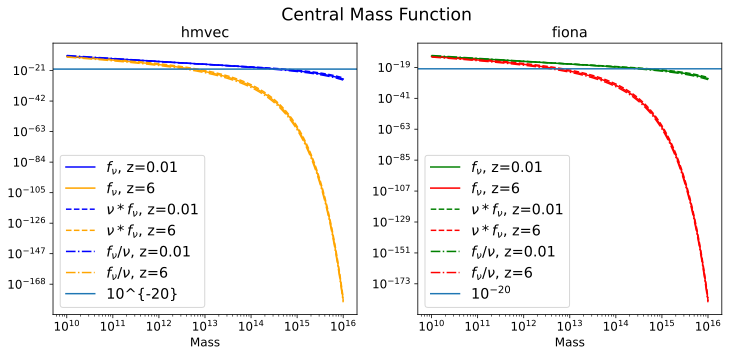

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

#hmvec
ax1.loglog(masses, nzm[0,:],  ls='-', color='blue', label=r'$f_\nu$, z=0.01')
ax1.loglog(masses, nzm[-1,:], ls='-', color='orange', label=r'$f_\nu$, z=6')
ax1.loglog(masses, (nus*nzm)[0,:],  ls='--', color='blue', label=r'$\nu*f_\nu$, z=0.01')
ax1.loglog(masses, (nus*nzm)[-1,:], ls='--', color='orange', label=r'$\nu*f_\nu$, z=6')
ax1.loglog(masses, (nzm/nus)[0,:],  ls='-.', color='blue', label=r'$f_\nu / \nu$, z=0.01')
ax1.loglog(masses, (nzm/nus)[-1,:], ls='-.', color='orange', label=r'$f_\nu / \nu$, z=6')

ax1.axhline(y=1e-20, label=r'10^{-20}')
ax1.set_title('hmvec')


#Fiona
ax2.loglog(fio_masses, fio_dndm[:,0],  ls='-', color ='green', label=r'$f_\nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1], ls='-', color ='red', label=r'$f_\nu$, z=6')
ax2.loglog(fio_masses, fio_dndm[:,0]  * np.transpose(fio_nus[0,:]),  ls='--', color='green', label=r'$\nu*f_\nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1] * np.transpose(fio_nus[-1,:]), ls='--', color='red', label=r'$\nu*f_\nu$, z=6')
ax2.loglog(fio_masses, fio_dndm[:,0]  / np.transpose(fio_nus[0,:]),  ls='-.', color='green', label=r'$f_\nu / \nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1] / np.transpose(fio_nus[-1,:]), ls='-.', color='red', label=r'$f_\nu / \nu$, z=6')

ax2.axhline(y=1e-20, label=r'$10^{-20}$')
ax2.set_title('fiona')

# plt.yscale('linear')
ax1.set_xlabel('Mass')
ax2.set_xlabel('Mass')
ax1.legend()
ax2.legend()
fig.suptitle('Central Mass Function');

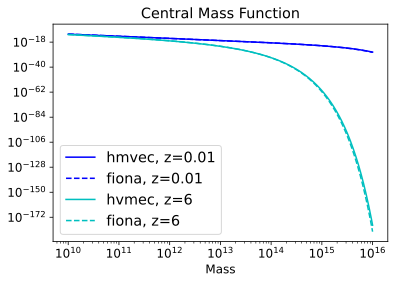

In [28]:
plt.loglog(masses, nzm[0,:], 'b', label='hmvec, z=0.01')
plt.loglog(fio_masses, fio_dndm[:,0], 'b--', label='fiona, z=0.01')

plt.loglog(masses, nzm[-1,:], 'c', label='hvmec, z=6')
plt.loglog(fio_masses, fio_dndm[:,-1], 'c--', label='fiona, z=6')

plt.xlabel('Mass')
plt.legend()
plt.title('Central Mass Function');

### Bias

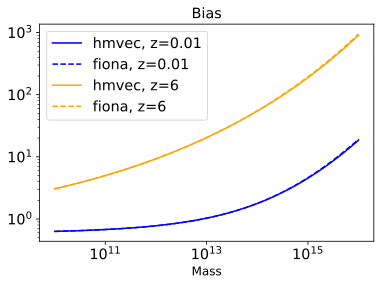

In [16]:
plt.loglog(masses, bh[0, :], label='hmvec, z=0.01', color='blue')
plt.loglog(fio_masses, fio_bias[:,0], label='fiona, z=0.01', color='blue', ls='--')

plt.loglog(masses, bh[-1, :], label='hmvec, z=6', color='orange')
plt.loglog(fio_masses, fio_bias[:,-1], label='fiona, z=6', color='orange', ls='--')

plt.xlabel('Mass')
plt.legend()
plt.title('Bias');

### Check normalization

#### Integrals:

In [17]:
nus

array([[ 0.42892918,  0.42923892,  0.42954902, ...,  5.46652506,
         5.47888238,  5.49127617],
       [ 0.43017954,  0.43049018,  0.43080119, ...,  5.4824604 ,
         5.49485373,  5.50728366],
       [ 0.4315325 ,  0.43184412,  0.4321561 , ...,  5.49970326,
         5.51213558,  5.5246046 ],
       ...,
       [ 2.01299253,  2.01444616,  2.01590149, ..., 25.6547576 ,
        25.71275128, 25.77091617],
       [ 2.14498959,  2.14653854,  2.14808929, ..., 27.33700549,
        27.39880196, 27.46078087],
       [ 2.28747495,  2.28912679,  2.29078055, ..., 29.15292247,
        29.2188239 , 29.28491989]])

In [36]:
#hmvec Normalization
mynormnus = np.trapz(bh*fnus*nus, x=nus, axis=-1)
mynorm = np.trapz(bh*fnus, x=nus, axis=-1)

#Fiona's Normalization
fio_norm = np.trapz(np.transpose(fio_bias * fio_dndm), x=fio_nus, axis=-1)
fio_normnus = np.trapz(fio_bias * fio_dndm * np.transpose(fio_nus), x=np.transpose(fio_nus), axis=0)

#### Plots

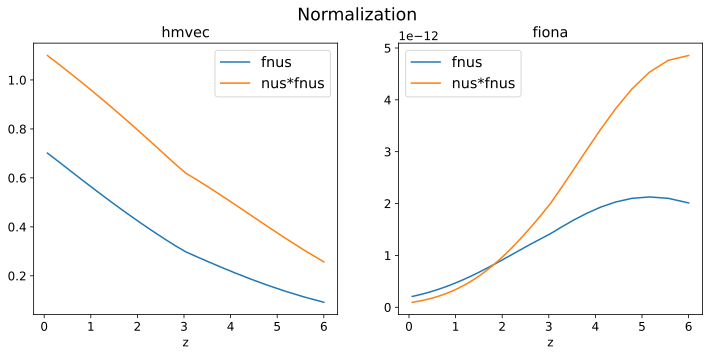

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

#hmvec Plot
ax1.plot(redshifts, mynorm, label='fnus')
ax1.plot(redshifts, mynormnus, label='nus*fnus')
ax1.set_xlabel('z')
ax1.set_title('hmvec')

#Fiona Plot
ax2.plot(redshifts, fio_norm, label='fnus')
ax2.plot(redshifts, fio_normnus, label='nus*fnus')
ax2.set_xlabel('z')
ax2.set_title('fiona')

#Super Plot
ax1.legend()
ax2.legend()
fig.suptitle('Normalization');

# Model

In [ ]:
#Grid for Integration
Nz = 210                                 # num of redshifts
Nm = 91                                 # num of masses
Nk = 1000                                # num of wavenumbers
redshifts = np.linspace(0.012, 10.22, Nz)             # redshifts
logmass = np.arange(6,15.005,0.1)
masses = 10**logmass           # masses
ells = np.linspace(150., 2000., 20)
ks = np.array([])
chis = cosmo.comoving_distance(redshifts).value
for ell in ells:
    ks = np.append(ks, ell/chis) 
ks = np.sort(ks)
freq = np.array([[271.0]])

#Initialize Halo Model
hcos = hm.HaloModel(redshifts, ks, ms=masses)

#Set CIB Parameters
hcos.set_cibParams('planck')

# CIB x CIB

### 3D Power Spectrum

First, let's get our 3D power spectrum.

In [ ]:
#Get Power Spectra
hcos.get_power_2halo('cib', nu_obs=[[545]])

In [ ]:
integrand = np.load('integrand.npy')

plt.contourf(redshifts, masses, integrand)
plt.title('2h D integrand: 545 Ghz')
plt.yscale('log')
plt.colorbar()
plt.xlabel('z')
plt.ylabel(r'Mass ($M_{\odot}$)')

ax = plt.gca()

#Y axis Ticks
majloc = plt.LogLocator(numticks=10)
ax.yaxis.set_major_locator(majloc)
minorticks = np.arange(0.1, 1, 0.1)
minloc = plt.LogLocator(subs=minorticks, numticks=10)
ax.yaxis.set_minor_locator(minloc)

print(ax.yaxis.get_minor_locator())
print(ax.yaxis.get_minor_formatter())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_minor_formatter())

plt.savefig('hmvec_int.pdf', dpi=600, bbox_inches='tight')

Now let's plot it. We expect it to peak at around k = 0.02

In [ ]:
#Which zs to look at
test_zs = np.array([0.1, 0.5, 1, 1.5, 3, 6, 7])

#Plot Power Spectra
plt.figure(figsize=(15,8))
for z in test_zs:
    #Get index
    zi = np.where(abs(z - redshifts) <= 0.05)[0][0]
    
    #Spectra
    plt.loglog(ks, Pjj_2h[zi,:], label=f"z = {redshifts[zi]:0.2f}")

#Plot Peak
kpeak = ks[np.argmax(Pjj_2h[0,:])]
plt.axvline(x = kpeak, ls='--', color='orange', label=f'Peak at k = {kpeak:0.3f}')

#Gravy
plt.legend()
plt.ylabel(r"$P_{jj, 2halo}$")
plt.xlabel('k')
plt.savefig('Pjj.png', dpi=500, bbox_inches='tight');

In [ ]:
#Plot the u(z,k)
plt.figure(figsize=(15,8))
for z in test_zs:
    plt.loglog(ks, hcos.u[z,])

### 2D Power Spectrum

Now let's integrate along the redshift to get the 2D power spectrum.

In [ ]:
#Limber Integrals
Nl = 1000
ells = np.linspace(5, 1000, Nl)
Cii, Cii_integrand = hcos.C_ii(ells, redshifts, ks, Pjj_2h, dcdzflag=True)

#Plot Cii
plt.loglog(ells, Cii)
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {freq[0,0]:0.0f} \;x\; {freq[0,0]:0.0f} }}_\ell$');
plt.savefig('Cii_2h.png', dpi=900, bbox_inches='tight')

## $\frac{dC_{II}}{dz} (z, \ell)$

There are still some wiggles at around $\ell \sim 2\times10^2 - 6 \times 10^2$, which should be smoothed out, so let's plot the integrand of the limber integral to see what's up.

In [ ]:
#Which ells to look at
test_ells = np.array([2.0e2, 3.0e2, 4.0e2, 5.0e2, 6.0e2])

#Plot
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Spectra
    plt.semilogy(redshifts, Cii_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC_{II}}{dz}$', fontsize=24)
    plt.legend()
plt.savefig('dCdz_ii_l.png', dpi=500, bbox_inches='tight');

# Lensing x Lensing

## $\frac{dC_{\kappa \kappa}}{dz} (z, \ell)$

First, let's add to the model.

In [ ]:
#Add to the model
zsource = 1.0 # delta-function source population
ngal = 1e-4 # number density of lenses per mpc3 (to solve for stellar mass threshold in HOD)
hcos.add_hod("g",ngal=ngal+redshifts*0.,corr="max")
hcos.add_battaglia_profile("electron",family="AGN",xmax=50,nxs=30000)

Now we can actually calculate all of the power spectra.

In [ ]:
#Power Spectra
Pnn = hcos.get_power("nfw",verbose=False)
Pne = hcos.get_power("nfw","electron",verbose=False )
Pee = hcos.get_power("electron","electron",verbose=False )
Pmm = hcos.total_matter_power_spectrum(Pnn,Pne,Pee)

#Limber Integrals
Ckk0, Ckk0_integrand = hcos.C_kk(ells,redshifts,ks,Pnn,lzs1=zsource,lzs2=zsource, dcdzflag=True)
Ckk, Ckk_integrand = hcos.C_kk(ells,redshifts,ks,Pmm,lzs1=zsource,lzs2=zsource, dcdzflag=True)

And finally, plot the integrand of the limber integral.

The first is $C/C_0$.

In [ ]:
plt.figure(figsize=(10,7))

for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Plot
    plt.semilogy(redshifts, Ckk_integrand[:, i]/Ckk0_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC^{\kappa \kappa}}{dC^{\kappa \kappa}_0}$', fontsize=24)
    plt.legend()

plt.savefig('dCdz_kk_0.png', dpi=500, bbox_inches='tight');

In [ ]:
#Plot
plt.figure(figsize=(10,7))

for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Plot
    plt.semilogy(redshifts, Ckk_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC^{\kappa \kappa}}{dz}$', fontsize=24)
    plt.legend()
    
plt.savefig('dCdz_kk.png', dpi=500, bbox_inches='tight');

### 2D Power Spectrum

Let's now manually integrate the integrand w.r.t. redshift to see if we get back our 2D power spectrum.

In [ ]:
#Integrate
Ckk_man = np.trapz(Ckk_integrand, redshifts, axis=0)
Ckk0_man = np.trapz(Ckk0_integrand, redshifts, axis=0)

#Plot
plt.figure(figsize = (7,5))
plt.plot(ells, Ckk_man/Ckk0_man, color='red', label='Manually integrated')
plt.plot(ells, Ckk/Ckk0, ls='--', label='From hmvec')
plt.ylabel(r"$C^{kk}/C^{kk}_{0}$")
plt.xlabel(r"$\ell$")
plt.legend()

plt.savefig('Ckk_compare.png', dpi=500, bbox_inches='tight');

We see that we are indeed looking at the correct integrand.